# Homework 03: Discrimination by Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Generating Random Points

In [2]:
np.random.seed(421)

data_1 = np.random.multivariate_normal(mean=np.array([+0.0, +2.5]),
                                       cov=np.array([[+3.2, +0.0],
                                                     [+0.0, +1.2]]), size=120)
data_2 = np.random.multivariate_normal(mean=np.array([-2.5, -2.0]),
                                       cov=np.array([[+1.2, +0.8],
                                                     [+0.8, +1.2]]), size=80)
data_3 = np.random.multivariate_normal(mean=np.array([+2.5, -2.0]),
                                       cov=np.array([[+1.2, -0.8],
                                                     [-0.8, +1.2]]), size=100)

X = np.vstack([data_1, data_2, data_3]) # data matrix
y_truth = np.concatenate([np.repeat(1, data_1.shape[0]),
                          np.repeat(2, data_2.shape[0]),
                          np.repeat(3, data_3.shape[0])])

data_set = np.hstack((X, y_truth[:, None]))

In [3]:
print(f"Data matrix:\n{X}")

Data matrix:
[[ 1.7997414   3.16415772]
 [-0.41092895  2.30752957]
 [ 2.14351818  1.59620054]
 [-1.80484727  2.22341154]
 [ 1.35828146  1.47306067]
 [-2.24539007  3.46696747]
 [ 0.55552008  3.87568149]
 [-0.17814965  1.53727062]
 [ 2.00858793  2.75975118]
 [ 1.68046967  3.39095393]
 [-1.43306767  1.99333459]
 [-1.64429705  1.91302696]
 [ 0.8530178   2.12582004]
 [ 0.07648148  2.93305567]
 [-1.2330479   4.03046394]
 [-0.045979    1.71625102]
 [-0.66222891  2.13738353]
 [ 4.50246267  4.15898768]
 [ 0.65523468  1.09073253]
 [ 0.65542467  3.36657839]
 [ 1.47789384  0.76697057]
 [ 0.68167624  1.44428866]
 [-0.87031221  1.53691294]
 [-1.69909104  2.08818437]
 [-0.67550981  2.40875149]
 [ 2.32477962  3.14646518]
 [ 0.85515536  3.44924279]
 [-2.47271367  2.23910578]
 [-1.71191993  1.64905201]
 [-0.24647324  2.60228446]
 [-2.4736941   1.33389922]
 [ 2.37811509  2.40178879]
 [-3.18262423  3.08463693]
 [-0.80255209  2.0760278 ]
 [ 2.51073564  4.55048774]
 [ 0.41067491  1.97414324]
 [ 1.35886712  

In [4]:
print(f"y_truth:\n{y_truth}")

y_truth:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


In [5]:
print(f"Data set:\n{data_set}")

Data set:
[[ 1.7997414   3.16415772  1.        ]
 [-0.41092895  2.30752957  1.        ]
 [ 2.14351818  1.59620054  1.        ]
 [-1.80484727  2.22341154  1.        ]
 [ 1.35828146  1.47306067  1.        ]
 [-2.24539007  3.46696747  1.        ]
 [ 0.55552008  3.87568149  1.        ]
 [-0.17814965  1.53727062  1.        ]
 [ 2.00858793  2.75975118  1.        ]
 [ 1.68046967  3.39095393  1.        ]
 [-1.43306767  1.99333459  1.        ]
 [-1.64429705  1.91302696  1.        ]
 [ 0.8530178   2.12582004  1.        ]
 [ 0.07648148  2.93305567  1.        ]
 [-1.2330479   4.03046394  1.        ]
 [-0.045979    1.71625102  1.        ]
 [-0.66222891  2.13738353  1.        ]
 [ 4.50246267  4.15898768  1.        ]
 [ 0.65523468  1.09073253  1.        ]
 [ 0.65542467  3.36657839  1.        ]
 [ 1.47789384  0.76697057  1.        ]
 [ 0.68167624  1.44428866  1.        ]
 [-0.87031221  1.53691294  1.        ]
 [-1.69909104  2.08818437  1.        ]
 [-0.67550981  2.40875149  1.        ]
 [ 2.32477962  

## Plotting Data

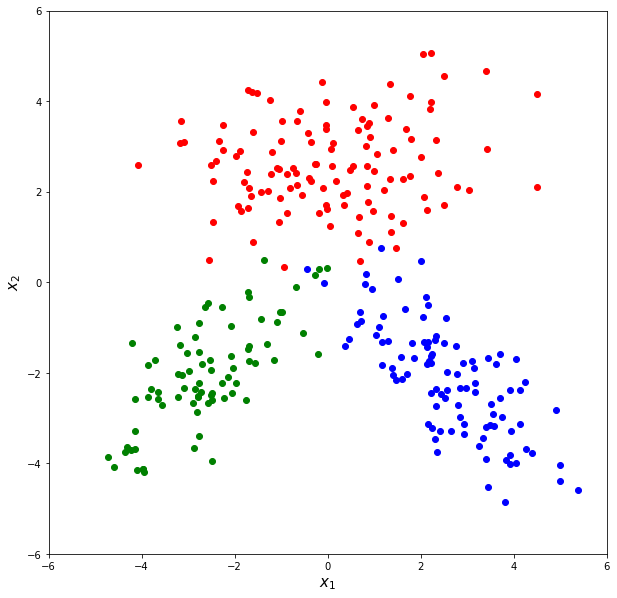

In [6]:
plt.figure(figsize = (10, 10))
plt.plot(data_1[:,0], data_1[:,1], 'ro')
plt.plot(data_2[:,0], data_2[:,1], 'go')
plt.plot(data_3[:,0], data_3[:,1], 'bo')
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.xlim(-6, +6)
plt.ylim(-6, +6)
plt.show()

In [7]:
# K: number of classes
K = np.max(y_truth)

# N: number of samples
N = data_set.shape[0]

# one-of-K encoding
Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), y_truth - 1] = 1

print(f"K, N: {(K, N)}\n")

print(f"Y_truth (one-of-K encoding):\n{Y_truth}")

K, N: (3, 300)

Y_truth (one-of-K encoding):
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 

## Sigmoid Function

$y = \hat{P}(C_1|\textbf{x}) = \textrm{sigmoid}(\boldsymbol{w}^{\top} \boldsymbol{x} + w_{0}) = \frac{1}{1 + \exp{[-(\textbf{w}^T\textbf{x}+w_0)]}}$

In [8]:
def sigmoid(X, W, w0):
    return 1 / (1 + np.exp(-(X@W) + np.repeat(w0, X.shape[0], axis=0)))

## Gradient Functions

\begin{align*}
\dfrac{\partial \textrm{Error}}{\partial \boldsymbol{w}_{c}} &= -\sum\limits_{i = 1}^{N} (y_{ic} - \widehat{y}_{ic})\boldsymbol{x}_{i} \\
\dfrac{\partial \textrm{Error}}{\partial w_{c0}} &= -\sum\limits_{i = 1}^{N} (y_{ic} - \widehat{y}_{ic}) 
\end{align*}

In [9]:
def gradient_W(X, Y_truth, Y_predicted):
    return(np.asarray([-np.matmul(Y_truth[:,c] - Y_predicted[:,c], X) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth - Y_predicted, axis = 0))

## Algorithm Parameters

In [10]:
eta = 0.01
epsilon = 0.001

## Parameter Initialization

In [11]:
np.random.seed(421)

W = np.random.uniform(low = -0.01, high = 0.01, size = (X.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

## Iterative Algorithm


**The sum of squared errors**:
$\newline\textrm{Error} = 0.5\sum_{i=1}^N\sum_{c=1}^K(y_{ic}-\hat{y}_{ic})^2\newline$

## Update Equations

$\Delta{w_j} = \eta\sum_t(r^t-y^t)x_j^t, j = 1,...,d$

$\Delta{w_0} = -\eta\sum_t(r^t-y^t)$

In [12]:
iteration = 1
objective_values = []

while 1:
    print(f"iteration #{iteration}")
    Y_predicted = sigmoid(X, W, w0)

    objective_values = np.append(objective_values, 0.5*np.sum((Y_truth - Y_predicted)**2))

    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(X, Y_truth, Y_predicted)
    w0 = w0 + eta * gradient_w0(Y_truth, Y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break

    iteration = iteration + 1

iteration #1
iteration #2
iteration #3
iteration #4
iteration #5
iteration #6
iteration #7
iteration #8
iteration #9
iteration #10
iteration #11
iteration #12
iteration #13
iteration #14
iteration #15
iteration #16
iteration #17
iteration #18
iteration #19
iteration #20
iteration #21
iteration #22
iteration #23
iteration #24
iteration #25
iteration #26
iteration #27
iteration #28
iteration #29
iteration #30
iteration #31
iteration #32
iteration #33
iteration #34
iteration #35
iteration #36
iteration #37
iteration #38
iteration #39
iteration #40
iteration #41
iteration #42
iteration #43
iteration #44
iteration #45
iteration #46
iteration #47
iteration #48
iteration #49
iteration #50
iteration #51
iteration #52
iteration #53
iteration #54
iteration #55
iteration #56
iteration #57
iteration #58
iteration #59
iteration #60
iteration #61
iteration #62
iteration #63
iteration #64
iteration #65
iteration #66
iteration #67
iteration #68
iteration #69
iteration #70
iteration #71
iteration #72
i

iteration #708
iteration #709
iteration #710
iteration #711
iteration #712
iteration #713
iteration #714
iteration #715
iteration #716
iteration #717
iteration #718
iteration #719
iteration #720
iteration #721
iteration #722
iteration #723
iteration #724
iteration #725
iteration #726
iteration #727
iteration #728
iteration #729
iteration #730
iteration #731
iteration #732
iteration #733
iteration #734
iteration #735
iteration #736
iteration #737
iteration #738
iteration #739
iteration #740
iteration #741
iteration #742
iteration #743
iteration #744
iteration #745
iteration #746
iteration #747
iteration #748
iteration #749
iteration #750
iteration #751
iteration #752
iteration #753
iteration #754
iteration #755
iteration #756
iteration #757
iteration #758
iteration #759
iteration #760
iteration #761
iteration #762
iteration #763
iteration #764
iteration #765
iteration #766
iteration #767
iteration #768
iteration #769
iteration #770
iteration #771
iteration #772
iteration #773
iteration 

In [13]:
print(f"Iteration completed in {iteration} steps.")

Iteration completed in 1210 steps.


In [14]:
print(f"W:\n{W}\n")
print(f"w0:\n{w0}\n")

W:
[[-0.67723968 -2.42009122  2.42893886]
 [ 7.17059648 -2.08967379 -2.28079817]]

w0:
[[3.82972553 3.15318481 2.77861437]]



## Convergence

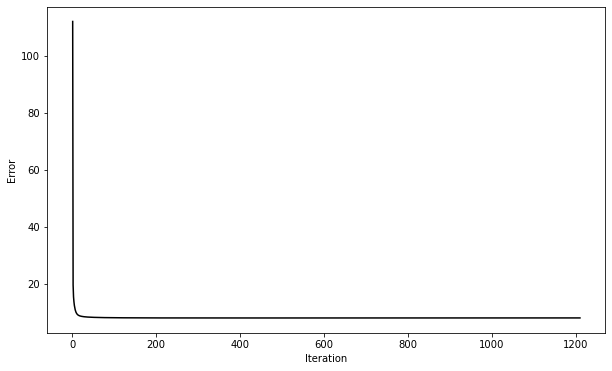

In [15]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Confusion Matrix

In [16]:
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_truth,
                               rownames = ['y_pred'], colnames = ['y_truth'])
print(f"Confusion Matrix:\n\n{confusion_matrix}")

Confusion Matrix:

y_truth    1   2   3
y_pred              
1        119   4   2
2          1  76   1
3          0   0  97


## Drawing Decision Boundaries

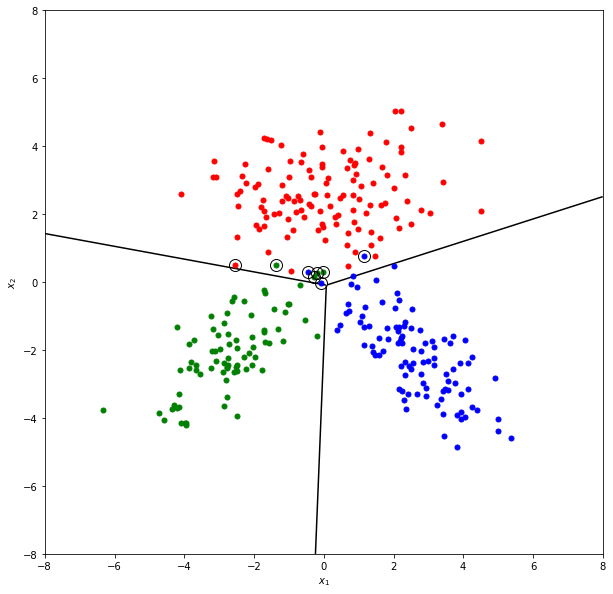

In [17]:
x1_interval = np.linspace(-8, +8, 1201)
x2_interval = np.linspace(-8, +8, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((len(x1_interval), len(x2_interval), K))
for c in range(K):
    discriminant_values[:,:,c] = W[0, c] * x1_grid + W[1, c] * x2_grid + w0[0, c]

A = discriminant_values[:,:,0]
B = discriminant_values[:,:,1]
C = discriminant_values[:,:,2]
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan
discriminant_values[:,:,0] = A
discriminant_values[:,:,1] = B
discriminant_values[:,:,2] = C

plt.figure(figsize = (10, 10))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,1], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,1] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()